# installation download the package or clone the repositor


In [ ]:
!pip install git+https://github.com/secnot/rectpack.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/secnot/rectpack.git to /tmp/pip-req-build-crgi_c2k
  Running command git clone -q https://github.com/secnot/rectpack.git /tmp/pip-req-build-crgi_c2k
  Created wheel for rectpack: filename=rectpack-0.2.2-py3-none-any.whl size=23498 sha256=2bea03c5e119163f26eb04790d88f9d70943f7eab8f1941e628199a70b67e603
  Stored in directory: /tmp/pip-ephem-wheel-cache-ukkkfzp7/wheels/de/20/10/907760563ff0f66271b6f0d08652c0465925570ff0c58d6676
Successfully built rectpack


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


편성 E_ITEM 갯수 : 60
선정된 E_ITME NO: [56, 53, 4, 49, 56, 39, 29, 58, 10, 53, 4, 62, 33, 40, 57, 16, 23, 6, 54, 21, 13, 7, 56, 64, 26, 37, 4, 45, 2, 33, 37, 58, 54, 63, 3, 67, 16, 22, 10, 29, 44, 34, 38, 8, 33, 56, 47, 21, 67, 24, 29, 38, 11, 59, 15, 46, 5, 25, 33, 53]
packed list [(0, 0, 0, 1050, 720, 'DUCT ASSY-RR HEATING,LH'), (0, 1050, 0, 600, 800, 'W/STRIP-FR DR BODY SIDE,RH'), (0, 0, 720, 710, 80, 'TRIM ASSY-FR PILLAR,RH'), (0, 0, 800, 810, 55, 'GARNISH ASSY-QTR SIDE, RH'), (0, 810, 800, 810, 55, 'GARNISH ASSY-QTR SIDE, RH'), (0, 0, 855, 760, 12, 'BRKT-W/S MOLDING MTG, RH'), (1, 0, 0, 1420, 370, 'TRIM ASSY-LUGGAGE SIDE,RH'), (1, 0, 370, 1420, 370, 'TRIM ASSY-LUGGAGE SIDE,LH'), (1, 1420, 0, 215, 427, 'LAMP ASSY-RR COMB O/S, LH'), (1, 1420, 427, 239, 357, 'TUBE-FEED'), (1, 0, 740, 570, 100, 'TRIM ASSY-FR DR SCUFF,LH'), (1, 570, 740, 570, 100, 'TRIM ASSY-FR DR SCUFF,RH'), (1, 1140, 784, 330, 85, 'RESERVOIR ASSY'), (1, 1635, 0, 35, 45, 'SENSOR ASSY-A/TYPE CRASH'), (1, 1635, 45, 35, 45, 'S

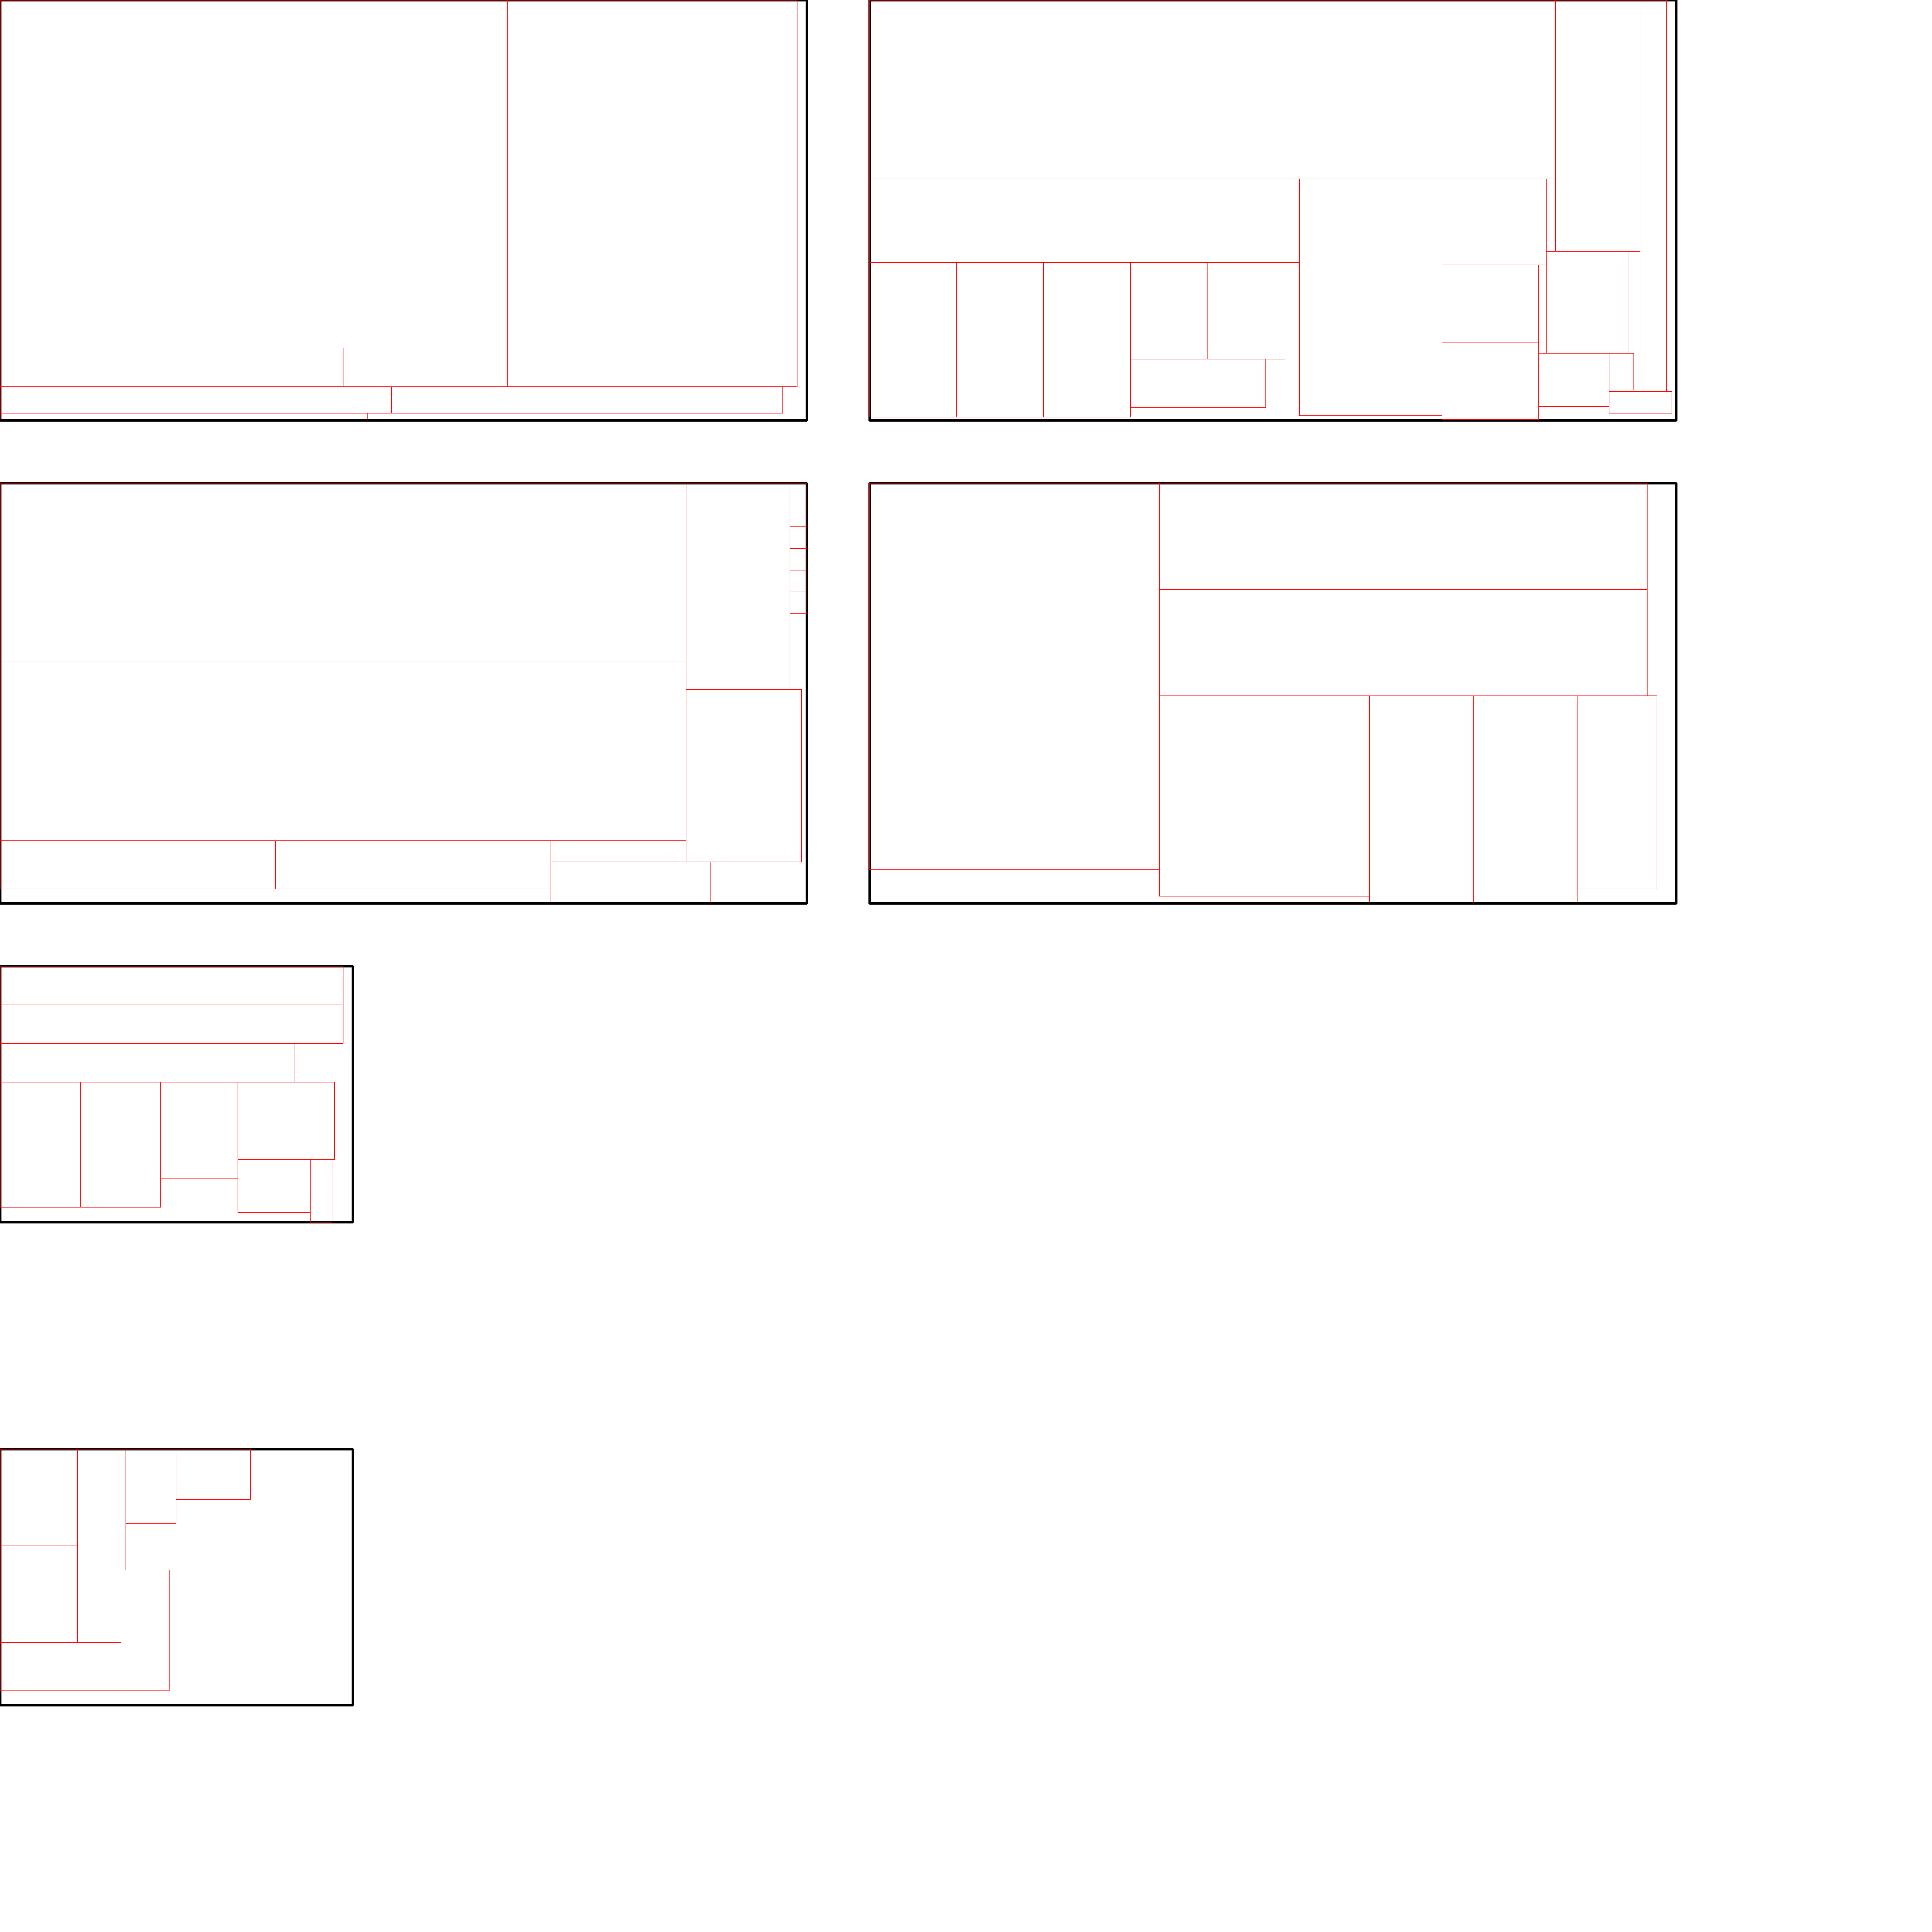

end


In [ ]:
import openpyxl
import pandas as pd
import os
import random
import array
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from rectpack import newPacker

packer = newPacker()
#박스 2종류
#대박스  (1670,870)
#중박스  (730,530)



############################################################################
# 시물레이션 정의
############################################################################
set_simulation_num = 30
set_sim_bbox = 4
set_sim_mbox = 4  
set_sim_eitem_min_count = 50 
set_sim_eitem_max_count = 70 

  
############################################################################
# 박스 정의
############################################################################
bins = [(1670, 870,set_sim_bbox),(730, 530,set_sim_mbox)]

# Add the bins where the rectangles will be placed
for b in bins:
  packer.add_bin(*b)
#  print('b',b)


############################################################################
# E_item list 불러오기 
############################################################################

filename = '/content/drive/MyDrive/Colab Notebooks/FD_list.xlsx'
eitemexcel = pd.read_excel(filename)
eitemlist = eitemexcel.values.tolist()

wb= openpyxl.load_workbook(filename , data_only=True)
sheet_list = wb.get_sheet_names()
w1=wb[sheet_list[0]]

############################################################################
# Random 편성 진행
############################################################################

### step 1 편성될 e_item random 갯수 생성

numeitem = random.randrange(set_sim_eitem_min_count,set_sim_eitem_max_count)
print('편성 E_ITEM 갯수 :', numeitem)

### Step 2 랜덤갯수 만큼 E-ITEM random 선정

v= []
select_eitem = array.array('l',v)
chk_list =[]
for y in range(1,numeitem+1):
  noofeitem = random.randrange(1,set_sim_eitem_max_count)
  while noofeitem in chk_list:
    noofeitem = random.randrange(1,set_sim_eitem_max_count)
  select_eitem.append(noofeitem)

print('선정된 E_ITME NO:', select_eitem.tolist())

### Step3 선정된 E_ITEM 값 불러 오기 From exel 
e_itemlist = []
for eitemno in select_eitem.tolist():
  e_itemlist.append((w1.cell(row=eitemno+1,column=3).value,w1.cell(row=eitemno+1,column=4).value,w1.cell(row=eitemno+1,column=2).value))

### Step4 E_ITEM Value Paker에 값 ADD 
for r in e_itemlist:
  packer.add_rect(*r)

#### Step5 알고지즘 실행 
packer.pack()

print('packed list',packer.rect_list())

#### Step 편성된 E_ITEM 확인 큰 item 들이 많은 것임.
import sys
total_box = len(packer)
packed_rec_count = len(packer.rect_list())

print('전체박스',total_box,'선정된 E_ITEM :', numeitem, '편성된 E_ITEM :',packed_rec_count)

if (numeitem > packed_rec_count) or total_box > 8:
  sys.exit("실패")
#else:
#  print('성공진행행')

if total_box <=4:
  big_box_count = total_box
  mid_box_count = 0
else:
  big_box_count = 4
  mid_box_count = total_box -4

big_box_rect = []
mid_box_rect = []

count = 70
i_count = 0
search_count = 0
searched_box = 0
#e_itemlist.append(
for i_count in range(total_box):
  ech_count = 0
  while True:
    if search_count >= numeitem:
      if i_count > 3:
        mid_box_rect.append( packed_rec_count - searched_box)
      else:
        big_box_rect.append( packed_rec_count - searched_box)
      break
 #   print('while',i_count,packer.rect_list()[search_count][0])
    if i_count < packer.rect_list()[search_count][0]:
      if i_count > 3:
        mid_box_rect.append(ech_count)
      else:
        big_box_rect.append(ech_count)
      searched_box = ech_count +searched_box
#      print('찾음',i_count,search_count,total_box) 

      break
    ech_count = ech_count +1  
    search_count = search_count+1

 

#  print(i_count,search_count,total_box) 

#print('big_box_rect',big_box_rect)
#print('mid_box_rect',mid_box_rect)

#각박스별 Rec

########################################################################


blue_color = (255,0,0)
green_color = (0,255,0)
red_color = (0,0,255)
Blk_color = (0,0,0)
#nbins

#######################################################
# BOX 그리기 & E_ITEM 그리기기
#######################################################

draw_rec = 0

#big_box_count 
#mid_box_count =
#big_box_rect = []
#mid_box_rect = []



image = np.full((4000, 4000, 3), 255, np.uint8)
offset_x = 1800
offset_y = 1000
sel_rect_total = 0
print('bin pack',packer.bin_list() )

for drawbin in range(total_box):
  if drawbin==0:
    offsetx = 0
    offsety = 0
  if drawbin==1:
    offsetx = 0
    offsety = offset_y
  if drawbin==2:
    offsetx = offset_x
    offsety = 0
  if drawbin==3:
    offsetx = offset_x
    offsety = offset_y
  if drawbin==4:
    offsetx = 0
    offsety = offset_y*2
  if drawbin==5:
    offsetx = 0
    offsety = offset_y*3
  if drawbin==6:
    offsetx = offset_x
    offsety = offset_y*2
  if drawbin==7:
    offsetx = offset_x
    offsety = offset_y*3
  image = cv2.rectangle(image, (offsetx,offsety), (packer.bin_list()[drawbin][0]+offsetx,packer.bin_list()[drawbin][1]+offsety), Blk_color, 3)

print(packer.rect_list()[draw_rec][1],packer.rect_list()[draw_rec][2])
print(packer.rect_list()[draw_rec][3],packer.rect_list()[draw_rec][4])

for draw_rect in range(packed_rec_count):
  if packer.rect_list()[draw_rect][0] ==0:
    offsetx = 0
    offsety = 0
  if packer.rect_list()[draw_rect][0] ==1:
    offsetx = 0
    offsety = offset_y
  if packer.rect_list()[draw_rect][0] ==2:
    offsetx = offset_x
    offsety = 0
  if packer.rect_list()[draw_rect][0] ==3:
    offsetx = offset_x
    offsety = offset_y
  if packer.rect_list()[draw_rect][0] ==4:
    offsetx = 0
    offsety = offset_y*2
  if packer.rect_list()[draw_rect][0] ==5:
    offsetx = 0
    offsety = offset_y*3
  if packer.rect_list()[draw_rect][0] ==6:
    offsetx = offset_x
    offsety = offset_y*2
  if packer.rect_list()[draw_rect][0] ==7:
    offsetx = offset_x
    offsety = offset_y*3 

  image = cv2.rectangle(image, (packer.rect_list()[draw_rect][1]+offsetx, packer.rect_list()[draw_rect][2]+offsety), (packer.rect_list()[draw_rect][1]+packer.rect_list()[draw_rect][3]+offsetx,packer.rect_list()[draw_rect][2]+packer.rect_list()[draw_rect][4]+offsety), red_color, 1)



cv2_imshow(image)
print('end')

#for draw_rec in range(big_box_rect[draw_rec]-1):
#  print('draw_rec',draw_rec)
#  image = cv2.rectangle(image, ( packer.rect_list()[draw_rec][1], packer.rect_list()[draw_rec][2]), (packer.rect_list()[draw_rec][3],packer.rect_list()[draw_rec][4]), red_color, 1)


 



